> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Analysis of Gun Quantities Alongside Demographics

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [49]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [50]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_census = pd.read_csv('u.s.-census-data.csv')# loads census data
#df_guns = pd.read_csv('gun-data_excel.csv', index_col='month')# Loads FBI data
df_guns = pd.read_csv('gun-data_excel.csv') #Loads FBI data
df_guns.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [51]:
#display first five lines of census data
df_census.head();

In [52]:
#check numbers of non-null values
df_guns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

In [53]:
# make a list of column headers for use later in graphs
locations = list(df_guns)

In [54]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
Fact              80 non-null object
Fact Note         28 non-null object
Alabama           65 non-null object
Alaska            65 non-null object
Arizona           65 non-null object
Arkansas          65 non-null object
California        65 non-null object
Colorado          65 non-null object
Connecticut       65 non-null object
Delaware          65 non-null object
Florida           65 non-null object
Georgia           65 non-null object
Hawaii            65 non-null object
Idaho             65 non-null object
Illinois          65 non-null object
Indiana           65 non-null object
Iowa              65 non-null object
Kansas            65 non-null object
Kentucky          65 non-null object
Louisiana         65 non-null object
Maine             65 non-null object
Maryland          65 non-null object
Massachusetts     65 non-null object
Michigan          65 non-null object
Minnesota

In [55]:
df_guns.shape

(12485, 27)

In [56]:
df_census.shape

(85, 52)

In [57]:
df_guns['month'] = pd.to_datetime(df_guns['month'])
df_guns.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null datetime64[ns]
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_

In [58]:
sum(df_guns.duplicated())

0

In [59]:
sum(df_census.duplicated())

3

In [60]:
# drop the duplicated columns
#df_census.drop_duplicates(inplace=True)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

I chose the census and FBI data for analysis because I'm interested in the different ways that demographics impact lifestyle.

There were locations in the FBI data that were not in the census data, so those rows were removed from the FBI data.  

The two datasets also handled time differently.  The FBI data used a month at a time, while the census data used a year at a time, so all of the data for a given state in each month of 2016 and 2010 in the FBI dataset had to be summed to create two new columns in the census dataset: 'total gun registrations in 2010' and 'total gun registrations in 2016'.

I began with the FBI data.  There were many null values in most of the columns, but in many cases, I was able to just discard the column altogether.  I was most interested in the total number of guns, as documented in the handguns and long_guns columns.  I would also have added the numbers from the 'other' column into the 'number_of_guns' column that I made, except that the 'other' column had too many null values and had to be removed, as did the rentals and many other columns.  

The census data had the states as columns whereas the FBI data had a row for each state, so the rows and columns had to be inverted in the census data before it could be appended to the FBI data.  After I transposed the rows and columns in the census data, there were 85 columns, but most of them were not needed for my analysis, so I removed the extra columns before I appended the data.  The columns I kept had long names that were no longer necessary to distinguish them from other columns with similar names, so I renamed those columns.  I checked the columns that I needed for duplicated rows and null values.  Finished with cleaning, I appended the census data to the FBI data and was ready to use the new dataframe to explore change in population dynamics and permitted gun ownership in each state for the year 2016.

I decided not to simply append the census data to the FBI data because of their different handling of time.  Instead, I added a new column to 

I used query and groupby to add the values for each given state in 2016 together.

$$$$$$$$Many of the columns had null values.  I changed the null values to zero where applicable: permit_recheck, handgun, long_gun, other, multiple, and admin.  For the permit column, however, I did not change the null values to zero, since that would have given them all the same permit number.  Duplicate values in the permit column needed to be dealt with because all data for a given permit should be in one row.  Duplicate values in the other columns were not a concern, because the same value could apply to more than one person, such as if they were in the same state or one bought a gun from another.$$$$$$$$$ I decided that most of this was wrong.  The permit column seems to be the number of permits in that state or the number of permits checked in that state, not a number to designate specifically which permit.$$$$$$$$$I removed the permit recheck, other, and the two rentals columns because they had too many null values.  Additionally, the rental information did not seem useful.  It had zero for a lot entries, but so many states going months at a time without anyone renting one gun does not seem realistic.  I was most interested in the number of guns per state over time, so I removed rows that had a null value for the month, state, handgun, or long_gun columns.  

In [61]:
df_guns.drop(['handgun', 'long_gun', 'other', 'returned_handgun', 'returned_long_gun', 'returned_other', 'totals', 'permit_recheck', 'admin', 'prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'rentals_handgun', 'rentals_long_gun', 'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'return_to_seller_handgun', 'return_to_seller_handgun', 'return_to_seller_long_gun', 'return_to_seller_other', 'multiple', 'redemption_handgun', 'redemption_long_gun', 'redemption_other'], axis=1, inplace = True)
df_guns.head()

,month,state,permit
0,2017-09-01,Alabama,16717.0
1,2017-09-01,Alaska,209.0
2,2017-09-01,Arizona,5069.0
3,2017-09-01,Arkansas,2935.0
4,2017-09-01,California,57839.0


In [62]:
sixteen = df_guns.loc[495:1154, :]
sixteen.head()

,month,state,permit
495,2016-12-01,Alabama,26996.0
496,2016-12-01,Alaska,254.0
497,2016-12-01,Arizona,8900.0
498,2016-12-01,Arkansas,3294.0
499,2016-12-01,California,61808.0


In [63]:
ten = df_guns.loc[4455:5114, :]
ten.head()

,month,state,permit
4455,2010-12-01,Alabama,413.0
4456,2010-12-01,Alaska,0.0
4457,2010-12-01,Arizona,2082.0
4458,2010-12-01,Arkansas,2582.0
4459,2010-12-01,California,24901.0


In [64]:
df_s = sixteen.groupby('state').sum()
df_s.head(55);

In [65]:
df_t = ten.groupby('state').sum()
df_t.head(55);

In [66]:
df_FBI = df_t

In [67]:
df_FBI['permits in 2016'] = df_t['permit']

In [68]:
df_FBI['permits in 2010'] = df_s['permit']

In [69]:
df_FBI.drop(['permit'], axis=1, inplace=True)

In [70]:
df_FBI.drop(['Virgin Islands', 'District of Columbia', 'Guam', 'Mariana Islands', 'Puerto Rico'], axis=0, inplace=True)

In [71]:
df_census.drop(['Fact Note'], axis=1, inplace=True)
df_census.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [72]:
df_census_transposed = df_census.T
df_census_transposed.head();

In [73]:
df_census_transposed.drop([1,2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84], axis = 1, inplace=True)
df_census_transposed.head()

,0,8,62
Fact,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2...","Population per square mile, 2010"
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56


In [74]:
#save the transposed dataset to a new csv file so that I can specify the second row as the header in the read_csv function
df_census_transposed.to_csv('us_census_data_transposed.csv')

In [75]:
#open and change the header to be the first row
df_new_census = pd.read_csv('us_census_data_transposed.csv', header=1)
df_new_census.head()

,Fact,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
0,Alabama,"4,863,300",16.10%,94.4
1,Alaska,"741,894",10.40%,1.2
2,Arizona,"6,931,071",16.90%,56.3
3,Arkansas,"2,988,248",16.30%,56
4,California,"39,250,017",13.60%,239.1


In [76]:
#rename first column to 'state' to match 'state' column in df_guns
df_new_census = df_new_census.rename(columns = {'Fact':'state'})
df_new_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
0,Alabama,"4,863,300",16.10%,94.4
1,Alaska,"741,894",10.40%,1.2
2,Arizona,"6,931,071",16.90%,56.3
3,Arkansas,"2,988,248",16.30%,56
4,California,"39,250,017",13.60%,239.1


In [77]:
# make state the index so that it won't just add on to the end
df_new_census.set_index('state', inplace=True)
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)","Population per square mile, 2010"
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [78]:
#shorten column names using rename as in line above
df_new_census = df_new_census.rename(columns = {'Population per square mile, 2010':'Pop per sq mi 2010'})
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [79]:
#shorten column name using rename
df_new_census = df_new_census.rename(columns = {'Population estimates, July 1, 2016, (V2016)':'Population 2016'})
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [80]:
#shorten column name using rename
df_new_census = df_new_census.rename(columns = {'Persons 65 years and over, percent, July 1, 2016, (V2016)':'65 and over 2016 (%)'})
df_new_census.head()

,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010
state,,,
Alabama,"4,863,300",16.10%,94.4
Alaska,"741,894",10.40%,1.2
Arizona,"6,931,071",16.90%,56.3
Arkansas,"2,988,248",16.30%,56
California,"39,250,017",13.60%,239.1


In [81]:
df_new_census['Permits in 2016'] = df_FBI['permits in 2016']

In [82]:
df_new_census['Permits in 2010'] = df_FBI['permits in 2010']

In [83]:
# change the index so that state is no longer the index
df_new_census.to_csv('newcensus.csv')
df_new_census = pd.read_csv('newcensus.csv')
df_new_census.head()

,state,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010
0,Alabama,"4,863,300",16.10%,94.4,4621.0,291039.0
1,Alaska,"741,894",10.40%,1.2,0.0,3121.0
2,Arizona,"6,931,071",16.90%,56.3,24751.0,87771.0
3,Arkansas,"2,988,248",16.30%,56,31305.0,55456.0
4,California,"39,250,017",13.60%,239.1,295252.0,1036981.0


In [84]:
# shorten name of data frame for less typing later
df = df_new_census

In [85]:
# Capitalize first column to match others.
df = df.rename(columns = {'state':'State'})
df.head()

,State,"Population estimates, July 1, 2016, (V2016)","Persons 65 years and over, percent, July 1, 2016, (V2016)",Pop per sq mi 2010,Permits in 2016,Permits in 2010
0,Alabama,"4,863,300",16.10%,94.4,4621.0,291039.0
1,Alaska,"741,894",10.40%,1.2,0.0,3121.0
2,Arizona,"6,931,071",16.90%,56.3,24751.0,87771.0
3,Arkansas,"2,988,248",16.30%,56,31305.0,55456.0
4,California,"39,250,017",13.60%,239.1,295252.0,1036981.0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
State                                                          50 non-null object
Population estimates, July 1, 2016,  (V2016)                   50 non-null object
Persons 65 years and over, percent,  July 1, 2016,  (V2016)    50 non-null object
Pop per sq mi 2010                                             50 non-null object
Permits in 2016                                                50 non-null float64
Permits in 2010                                                50 non-null float64
dtypes: float64(2), object(4)
memory usage: 2.4+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: How has the number of people purchasing guns changed over the past decade?

<Container object of 3 artists>

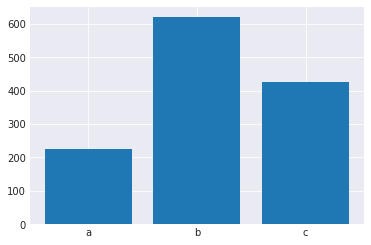

In [87]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#pd.plotting.scatter_matrix(df, figsize=(15, 15));
# make a bar chart using matplotlib
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c'])

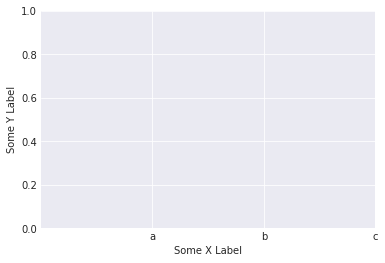

In [88]:
# specify x coordinates of tick labels and their labels
plt.xticks([1, 2, 3], ['a', 'b', 'c']);
plt.title('')
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label');

### Research Question 2: Is there any correlation between the number of gun permits for a state and the proportion of inhabitants in the 65 and older age group ?

In [89]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# make a bar chart using matplotlib
heights1 = df.list('Permits in 2016')
heights2 = df.list('Persons 65 years and over, percent, July 1, 2016, (V2016)')
#labels = ['Low', 'High']
#plt.bar(locations, heights, tick_label=locations)
plt.bar(locations, heights, tick_label=locations)
# specify x coordinates of tick labels and their labels
#plt.xticks(locations);
plt.title('Number of Firearm Permits by State')
plt.xlabel('State')
plt.ylabel('Permits')

AttributeError: 'DataFrame' object has no attribute 'list'

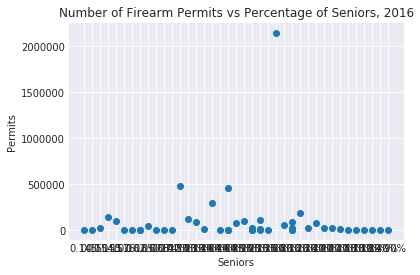

In [90]:
x = df['Persons 65 years and over, percent,  July 1, 2016,  (V2016)']
y = df['Permits in 2016']
plt.scatter(x,y)
plt.title('Number of Firearm Permits vs Percentage of Seniors, 2016')
plt.xlabel('Seniors')
plt.ylabel('Permits')
plt.show()

<a id='conclusions'></a>
## Conclusions
A major shortcoming is the fact that seniors are expressed as a percentage of the population but number of gun permits is used without comparison to the total population.  This dataset does not attempt to address illegal gun purchases.
> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [91]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0